In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize


In [19]:
df = pd.read_csv("filled_scout.csv")

In [20]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [21]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [22]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [23]:
df.shape

(15919, 26)

In [24]:
df.head(1).T

,0
make_model,Audi A1
body_type,Sedans
price,15770
vat,VAT deductible
km,56013.0
Type,Used
Fuel,Diesel
Gears,7.0
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput..."


C:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


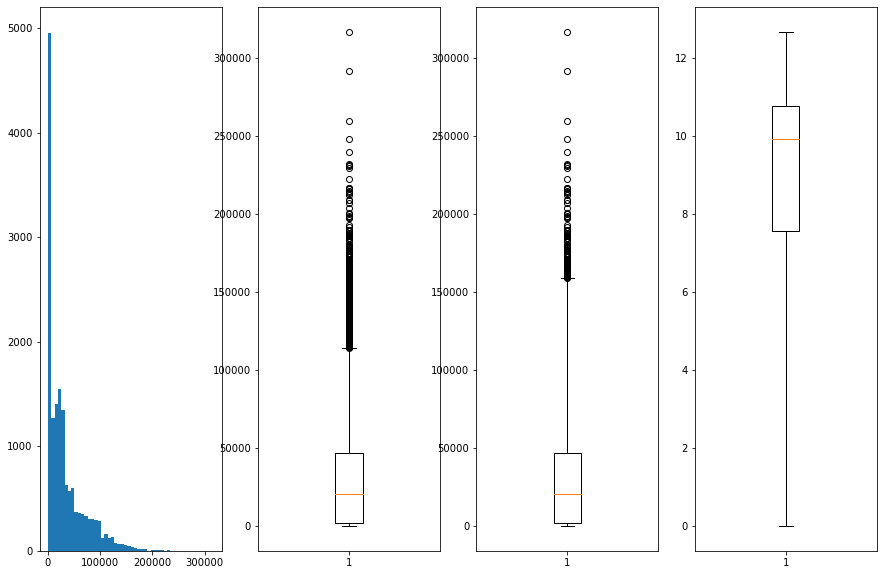

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show();

In [26]:
df.cons_comb.describe()

count    15919.000000
mean         4.832141
std          0.867504
min          3.000000
25%          4.100000
50%          4.800000
75%          5.400000
max          9.100000
Name: cons_comb, dtype: float64

In [27]:
df.cons_comb.sort_values().head(10)

6440     3.0
2863     3.0
2862     3.0
13493    3.0
13482    3.0
11004    3.0
11015    3.0
11044    3.0
811      3.0
6240     3.0
Name: cons_comb, dtype: float64

In [28]:
df.cons_comb.sort_values().tail(10)

3601     8.3
3649     8.3
10789    8.6
12553    8.6
12530    8.6
12422    8.6
10817    8.7
12054    8.7
12529    8.7
10771    9.1
Name: cons_comb, dtype: float64

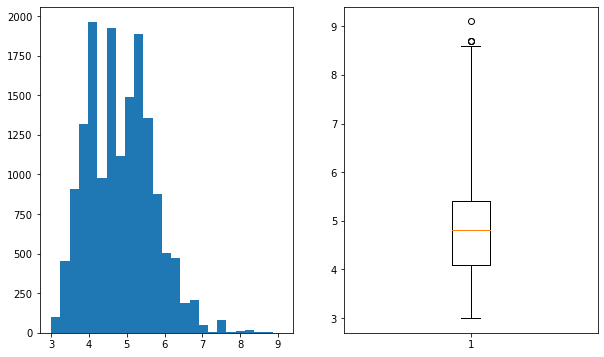

In [29]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2.5)

plt.show()

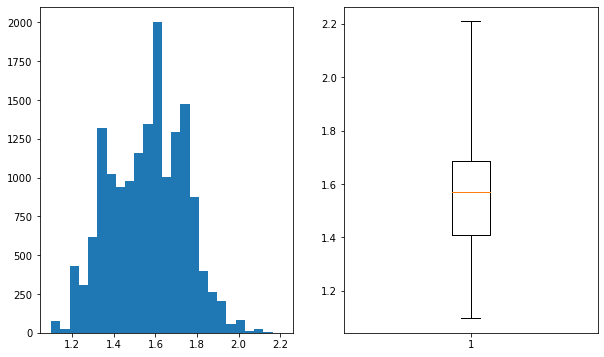

In [30]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(np.log(df.cons_comb), bins = 25)

plt.subplot(122)
plt.boxplot(np.log(df.cons_comb), whis = 2)

plt.show()

In [31]:
df.Displacement_cc.describe()

count    15919.000000
mean      1425.609335
std        329.720022
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Displacement_cc, dtype: float64

In [32]:
df.sort_values(by = ["Displacement_cc"], ascending = False)["Displacement_cc"].head(55)

10932    16000.0
7169     15898.0
10771     2967.0
3595      2480.0
3587      2480.0
3649      2480.0
3590      2480.0
3599      2480.0
3598      2480.0
3596      2480.0
3600      2480.0
3601      2480.0
3610      2480.0
3609      2480.0
3608      2480.0
3606      2480.0
3605      2480.0
3648      2480.0
3592      2480.0
3593      2480.0
3602      2480.0
3604      2480.0
3603      2480.0
12176     2000.0
12462     2000.0
12521     2000.0
12170     2000.0
13027     2000.0
11929     2000.0
12179     2000.0
11935     2000.0
12181     2000.0
11800     2000.0
4188      2000.0
12526     2000.0
12959     2000.0
12527     2000.0
11977     2000.0
12469     2000.0
12520     2000.0
12464     2000.0
12265     2000.0
11870     2000.0
10556     2000.0
2903      2000.0
15197     2000.0
12414     2000.0
11988     2000.0
13050     2000.0
12412     2000.0
10464     2000.0
12560     2000.0
12411     2000.0
11032     2000.0
13054     2000.0
Name: Displacement_cc, dtype: float64

In [33]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [34]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [35]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [36]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.0    5077
999.0     2467
1398.0    1388
1399.0     772
1461.0     682
          ... 
1369.0       1
1390.0       1
1195.0       1
2967.0       1
1800.0       1
Name: Displacement_cc, Length: 68, dtype: int64


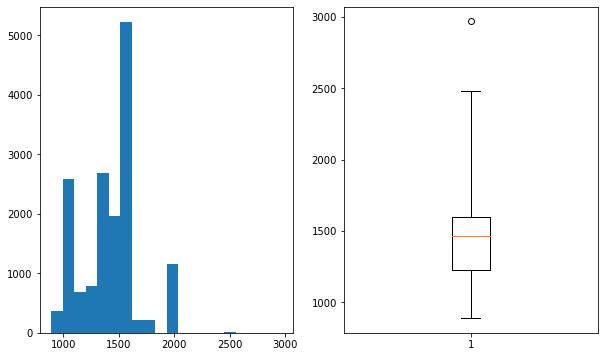

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis = 2.5)

plt.show()

In [38]:
df.Nr_of_Doors.value_counts(dropna = False)

5.0    11787
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: Nr_of_Doors, dtype: int64

In [39]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [40]:
df.Nr_of_Doors.value_counts(dropna = False)

5.0    11787
4.0     3079
3.0      832
2.0      219
NaN        2
Name: Nr_of_Doors, dtype: int64

In [41]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.0    11789
4.0     3079
3.0      832
2.0      219
Name: Nr_of_Doors, dtype: int64


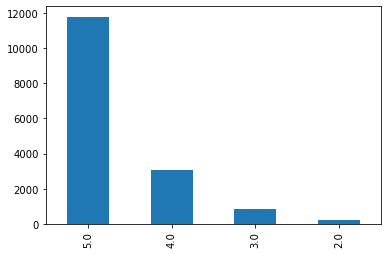

In [42]:
df.Nr_of_Doors.value_counts(dropna = False).plot.bar();

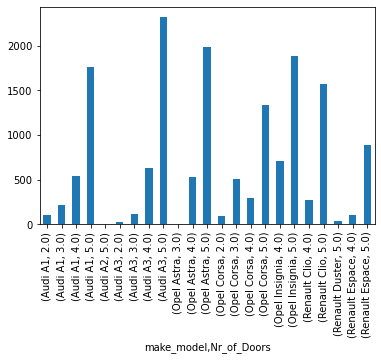

In [43]:
df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar();

In [44]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

In [45]:
df.Nr_of_Seats.value_counts(dropna = False)

5.0    14308
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr_of_Seats, dtype: int64

In [46]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [47]:
df.Nr_of_Seats.value_counts(dropna = False)

5.0    14308
4.0     1127
7.0      362
2.0      119
NaN        3
Name: Nr_of_Seats, dtype: int64

In [48]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.0    14311
4.0     1127
7.0      362
2.0      119
Name: Nr_of_Seats, dtype: int64


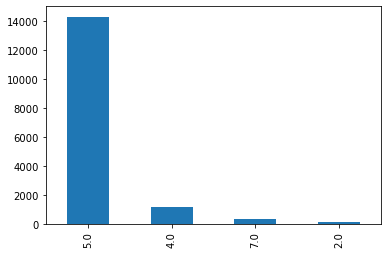

In [49]:
df.Nr_of_Seats.value_counts(dropna = False).plot.bar();

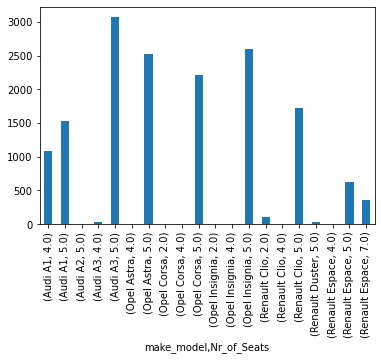

In [50]:
df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar();

In [51]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

In [52]:
df.Weight_kg.describe()

count    15919.000000
mean      1337.432251
std        200.466210
min          1.000000
25%       1165.000000
50%       1295.000000
75%       1472.000000
max       2471.000000
Name: Weight_kg, dtype: float64

In [53]:
df["Weight_kg"].sort_values().head(10)

8355       1.0
12779      1.0
1143     102.0
8857     840.0
14313    900.0
13513    977.0
13555    977.0
14654    980.0
14105    980.0
13999    980.0
Name: Weight_kg, dtype: float64

In [54]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [55]:
df["Weight_kg"].isnull().sum()

3

In [56]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.0    1583
1360.0    1419
1487.0     967
1135.0     837
1425.0     744
          ... 
1331.0       1
1132.0       1
1252.0       1
1792.0       1
2037.0       1
Name: Weight_kg, Length: 432, dtype: int64


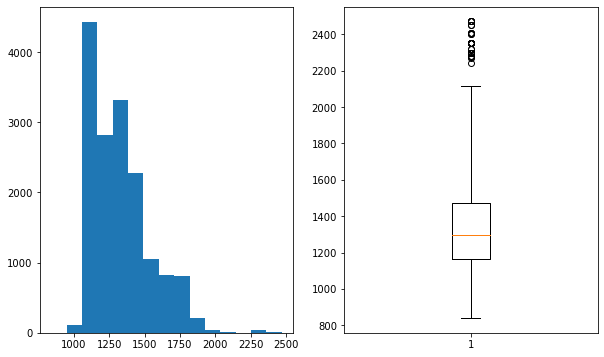

In [57]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

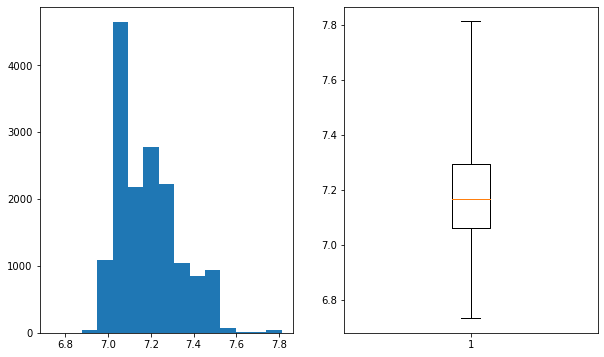

In [58]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.Weight_kg), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.Weight_kg), whis=2.5)

plt.show()

In [59]:
df.hp_kW.describe()

count    15919.000000
mean        88.373893
std         26.844440
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp_kW, dtype: float64

In [60]:
df.hp_kW.sort_values().head(50)

6034      1.0
6946      1.0
7014      1.0
9285      1.0
9287      1.0
6005      1.0
9288      1.0
7018      1.0
9289      1.0
9290      1.0
9292      1.0
9299      1.0
10610     1.0
10580     1.0
10579     1.0
10468     1.0
15155     1.0
15156     1.0
7019      1.0
7016      1.0
13885     4.0
3913      9.0
8857     40.0
13759    40.0
8408     44.0
10282    51.0
10283    51.0
10284    51.0
10285    51.0
10286    51.0
10287    51.0
9145     51.0
10288    51.0
10346    51.0
10281    51.0
10330    51.0
9026     51.0
9025     51.0
10342    51.0
10289    51.0
9159     51.0
9384     51.0
9158     51.0
10290    51.0
10291    51.0
10345    51.0
10280    51.0
10279    51.0
10278    51.0
10264    51.0
Name: hp_kW, dtype: float64

In [61]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  51.,  44.,  55.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [62]:
df.hp_kW.loc[df.hp_kW < 40] = np.nan

C:\Users\fattm\AppData\Local\Temp\ipykernel_15900\3345655671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.hp_kW.loc[df.hp_kW < 40] = np.nan


In [63]:
df.hp_kW.isnull().sum()

22

In [64]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.0     2544
66.0     2124
81.0     1403
100.0    1317
110.0    1117
         ... 
75.0        1
132.0       1
115.0       1
195.0       1
133.0       1
Name: hp_kW, Length: 77, dtype: int64


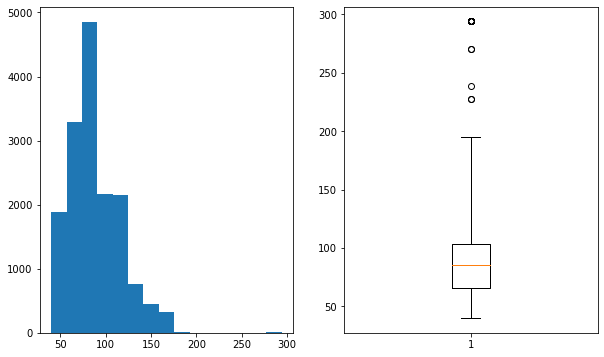

In [65]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

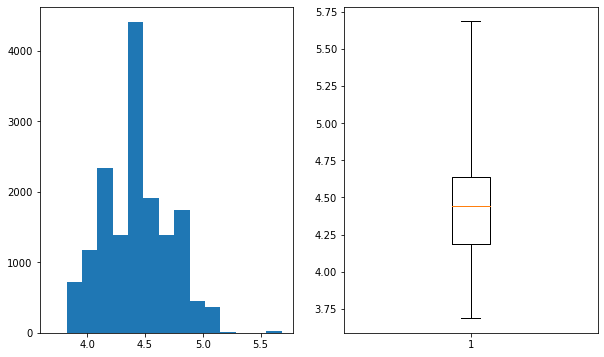

In [66]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.hp_kW), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.hp_kW), whis=2.5)

plt.show()

In [67]:
df.CO2_Emission.describe()

count    15919.000000
mean       110.671750
std         33.843841
min          0.000000
25%        104.000000
50%        116.000000
75%        128.000000
max        990.000000
Name: CO2_Emission, dtype: float64

In [68]:
df.CO2_Emission.value_counts().sort_index()

0.00       2
1.00      84
1.06       1
5.00       3
8.00      25
          ..
199.00     2
239.00     1
253.00     1
331.00     1
990.00     1
Name: CO2_Emission, Length: 123, dtype: int64

In [69]:
df.groupby(["make_model", "body_type","CO2_Emission"]).price.describe()

count          mean          std  \
make_model     body_type CO2_Emission                                     
Audi A1        Compact   1.0             1.0  20881.000000          NaN   
                         9.0             1.0  12479.000000          NaN   
                         10.0          147.0  16946.870748  2850.063119   
                         11.0           25.0  19960.360000  2676.261601   
                         14.0            2.0  28750.000000   268.700577   
...                                      ...           ...          ...   
Renault Espace Van       175.0           6.0  36931.666667  2811.670867   
                         188.0           1.0  43080.000000          NaN   
                         191.0           2.0  28465.000000     0.000000   
                         193.0           1.0  38990.000000          NaN   
                         194.0           1.0  46490.000000          NaN   

                                           min      25%      50%       75%  \
make_model     body_type CO2_Emission                                        
Audi A1        Compact   1.0           20881.0  20881.0  20881.0  20881.00   
                         9.0           12479.0  12479.0  12479.0  12479.00   
                         10.0           9950.0  15765.0  16450.0  18333.00   
                         11.0          14930.0  17970.0  19990.0  21460.00   
                         14.0          28560.0  28655.0  28750.0  28845.00   
...                                        ...      ...      ...       ...   
Renault Espace Van       175.0         33781.0  35630.0  35830.0  38286.75   
                         188.0         43080.0  43080.0  43080.0  43080.00   
                         191.0         28465.0  28465.0  28465.0  28465.00   
                         193.0         38990.0  38990.0  38990.0  38990.00   
                         194.0         46490.0  46490.0  46490.0  46490.00   

                                           max  
make_model     body_type CO2_Emission           
Audi A1        Compact   1.0           20881.0  
                         9.0           12479.0  
                         10.0          29150.0  
                         11.0          28980.0  
                         14.0          28940.0  
...                                        ...  
Renault Espace Van       175.0         41480.0  
                         188.0         43080.0  
                         191.0         28465.0  
                         193.0         38990.0  
                         194.0         46490.0  

[733 rows x 8 columns]

In [70]:
cond = ((df.CO2_Emission < 52) | (df.CO2_Emission > 330))
df.loc[cond, "CO2_Emission"] = np.nan

In [71]:
df.CO2_Emission.isnull().sum()

1188

In [72]:
fill(df, "make_model", "body_type", "CO2_Emission", "median")

Number of NaN :  0
------------------
120.0    842
99.0     828
106.0    756
104.0    681
139.0    633
        ... 
190.0      1
160.0      1
80.0       1
253.0      1
193.0      1
Name: CO2_Emission, Length: 101, dtype: int64


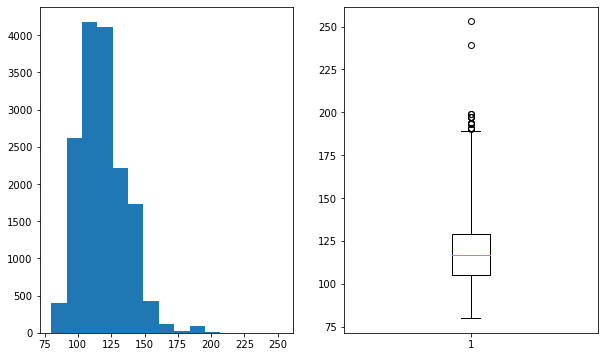

In [73]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=15)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

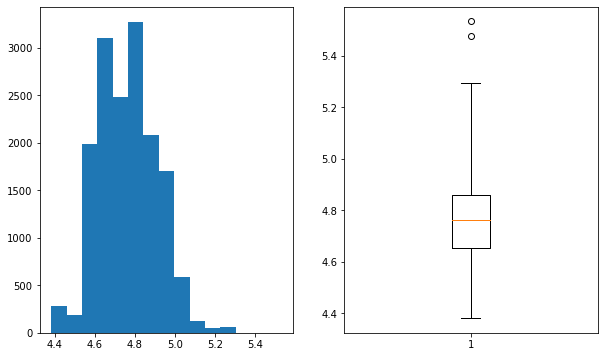

In [74]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.CO2_Emission), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.CO2_Emission), whis=2.5)

plt.show()

In [75]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [76]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [77]:
df.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [78]:
df.reset_index(drop = True, inplace = True)

In [79]:
df.shape

(15915, 24)

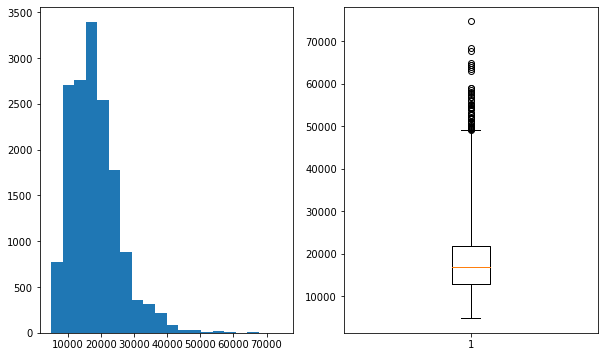

In [80]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

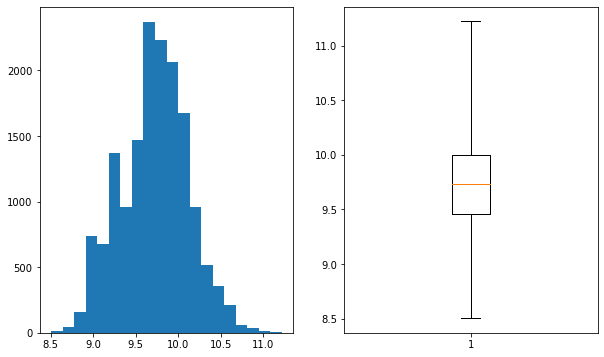

In [81]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df.price), bins=20)

plt.subplot(122)
plt.boxplot(np.log(df.price), whis=2.3)

plt.show()

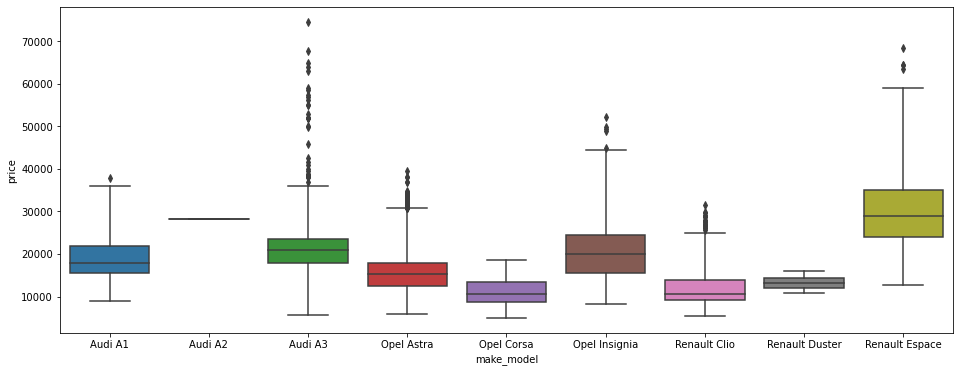

In [82]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=2.3)
plt.show()

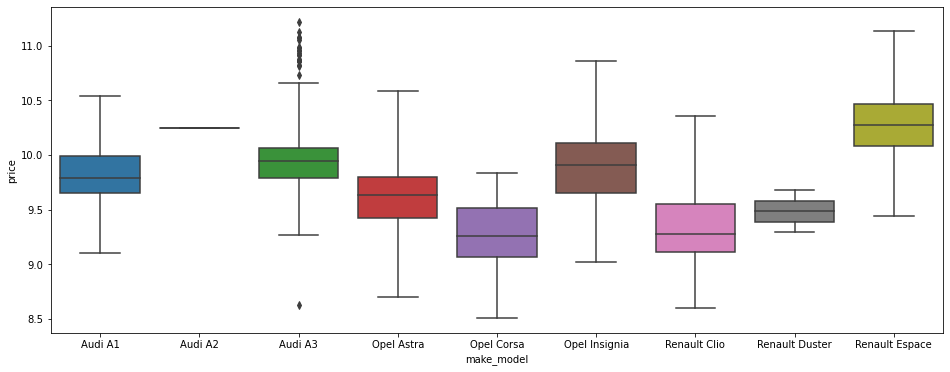

In [83]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y=np.log(df.price), data=df, whis=2.3)
plt.show()

In [84]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9,114.0


In [85]:
df.drop(index = [2614], inplace = True)

In [86]:
df.reset_index(drop = True, inplace = True)

In [87]:
df.shape

(15914, 24)

In [88]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.0,80000.0,83450.0
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Gears,7.0,7.0,7.0
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"


In [89]:
numeric_col = "price,km,Gears,Previous_Owners,cons_comb,Displacement_cc,age,hp_kW,Weight_kg,CO2_Emission".split(",")

In [90]:
df_num = df[numeric_col]

In [91]:
df_num

,price,km,Gears,Previous_Owners,cons_comb,Displacement_cc,age,hp_kW,Weight_kg,CO2_Emission
0,15770,56013.000000,7.0,2.0,3.8,1422.0,3.0,66.0,1220.0,99.0
1,14500,80000.000000,7.0,1.0,5.6,1798.0,2.0,141.0,1255.0,129.0
2,14640,83450.000000,7.0,1.0,3.8,1598.0,3.0,85.0,1135.0,99.0
3,14500,73000.000000,6.0,1.0,3.8,1422.0,3.0,66.0,1195.0,99.0
4,16790,16200.000000,7.0,1.0,4.1,1422.0,3.0,66.0,1135.0,109.0
...,...,...,...,...,...,...,...,...,...,...
15909,39950,1647.362609,6.0,1.0,5.3,1997.0,0.0,147.0,1758.0,139.0
15910,39885,9900.000000,7.0,1.0,7.4,1798.0,0.0,165.0,1708.0,168.0
15911,39875,15.000000,6.0,1.0,5.3,1997.0,0.0,146.0,1734.0,139.0
15912,39700,10.000000,6.0,1.0,5.3,1997.0,0.0,147.0,1758.0,139.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15914 non-null  object 
 1   body_type            15914 non-null  object 
 2   price                15914 non-null  int64  
 3   vat                  15914 non-null  object 
 4   km                   15914 non-null  float64
 5   Type                 15914 non-null  object 
 6   Fuel                 15914 non-null  object 
 7   Gears                15914 non-null  float64
 8   Comfort_Convenience  14994 non-null  object 
 9   Entertainment_Media  15914 non-null  object 
 10  Extras               15914 non-null  object 
 11  Safety_Security      15914 non-null  object 
 12  age                  15914 non-null  float64
 13  Previous_Owners      15914 non-null  float64
 14  hp_kW                15914 non-null  float64
 15  Inspection_new       15914 non-null 

In [93]:
df.shape

(15914, 24)

In [94]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [95]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [96]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [97]:
df.shape

(15914, 114)

In [98]:
df_final = pd.get_dummies(df, drop_first=True)

In [99]:
df_final.shape

(15914, 137)

In [100]:
df_final.head().T

,0,1,2,3,4
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
Gears,7.0,7.0,7.0,6.0,7.0
age,3.0,2.0,3.0,3.0,3.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
Upholstery_type_alcantara,0.0,0.0,0.0,0.0,0.0
Gearing_Type_Manual,0.0,0.0,0.0,0.0,0.0
Gearing_Type_Semi-automatic,0.0,0.0,0.0,0.0,0.0
Drive_chain_front,1.0,1.0,1.0,1.0,1.0


In [101]:
df_final.to_csv("final_scout_dummy.csv", index=False)